# ***Data Prep***

In [1]:
import pandas as pd 
import numpy as np 
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams 
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.statespace.tools import diff
import statsmodels.api as sm 
from statsmodels.tsa.stattools import acovf, acf, pacf, pacf_yw, pacf_ols
import warnings 
warnings.filterwarnings('ignore')
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA, ARIMA, ARMAResults, ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
!pip install statsmodels
import statsmodels.api as sm
!pip install pmdarima
import pmdarima
!pip install pyramid
import pyramid as pm
!pip install arch yfinance pmdarima
from statsmodels.tsa.arima_model import ARIMA
from arch import arch_model

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from statsmodels.tsa.stattools import adfuller 
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from datetime import datetime
from datetime import datetime,timedelta
from statsmodels.tsa.arima_model import ARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX
import io, os, sys, setuptools, tokenize
!pip install pystan~=2.14
!pip install fbprophet
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_cross_validation_metric
from fbprophet.plot import add_changepoints_to_plot 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [4]:
df = pd.read_csv('Palm_Oil.csv', index_col = 'Date', parse_dates=True)

In [5]:
df

,Price
Date,
2021-06-01,114.0
2021-06-02,113.0
2021-06-03,114.0
2021-06-04,114.0
2021-06-05,114.0
...,...
2022-11-26,127.5
2022-11-27,127.5
2022-11-28,130.0


In [6]:
df.dropna()

,Price
Date,
2021-06-01,114.0
2021-06-02,113.0
2021-06-03,114.0
2021-06-04,114.0
2021-06-05,114.0
...,...
2022-11-26,127.5
2022-11-27,127.5
2022-11-28,130.0


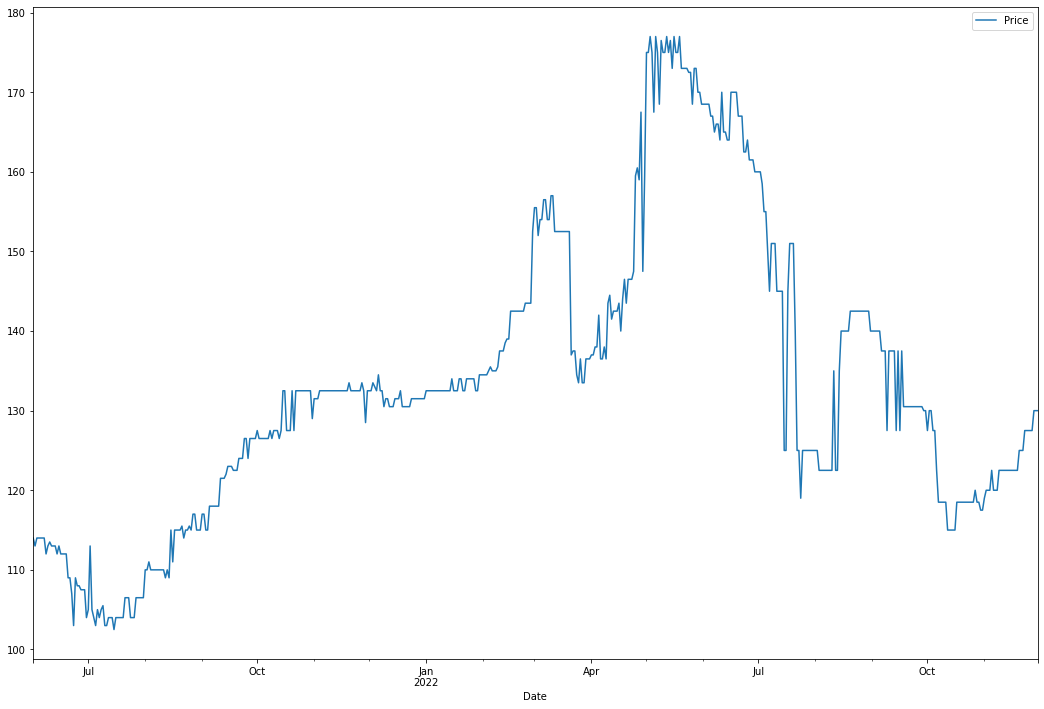

In [7]:
df.plot(figsize = (18, 12));

In [8]:
results = seasonal_decompose(df['Price'], model = 'addtive')

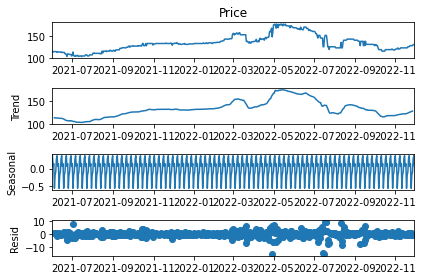

In [9]:
results.plot();

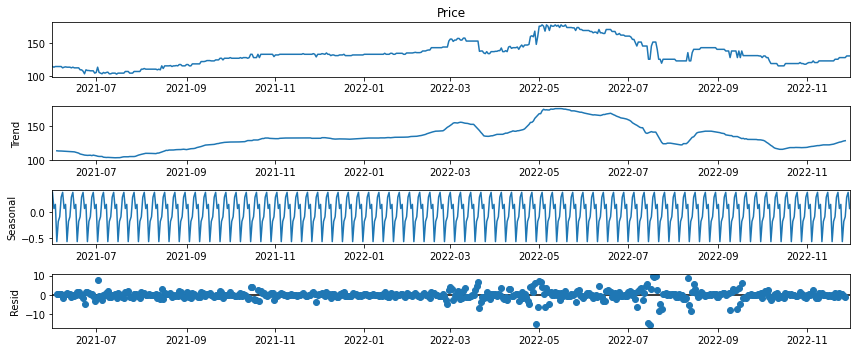

In [10]:
#from pylab import rcParams 
rcParams['figure.figsize'] = 12, 5 

results.plot();

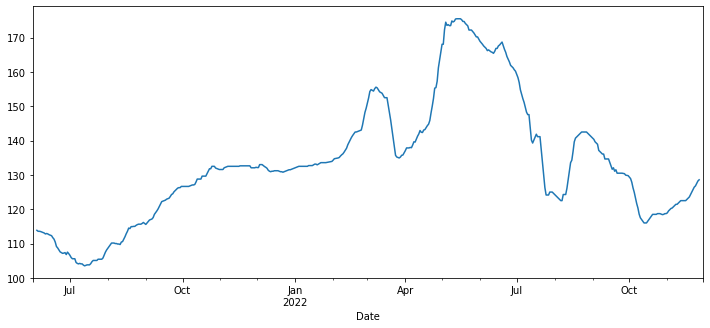

In [11]:
results.trend.plot()

In [12]:
df.index.freq = 'D'

In [13]:
df.head()

,Price
Date,
2021-06-01,114.0
2021-06-02,113.0
2021-06-03,114.0
2021-06-04,114.0
2021-06-05,114.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 548 entries, 2021-06-01 to 2022-11-30
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   548 non-null    float64
dtypes: float64(1)
memory usage: 8.6 KB


In [15]:
train_data = df.iloc[:500]
test_data = df.iloc[499:]

# ***Exponential Smoothing***

In [16]:
fitted_model = ExponentialSmoothing(train_data['Price'], trend = 'add', seasonal = 'add', seasonal_periods=30).fit()

In [17]:
test_predictions = fitted_model.forecast(49)

In [18]:
test_predictions

2022-10-14    115.237296
2022-10-15    117.455851
2022-10-16    117.081178
2022-10-17    116.830937
2022-10-18    116.268524
2022-10-19    115.924811
2022-10-20    115.049905
2022-10-21    114.706250
2022-10-22    115.487210
2022-10-23    115.299845
2022-10-24    115.355965
2022-10-25    116.326665
2022-10-26    115.297216
2022-10-27    116.297128
2022-10-28    116.973440
2022-10-29    116.914850
2022-10-30    117.208667
2022-10-31    116.767804
2022-11-01    116.738164
2022-11-02    116.738483
2022-11-03    115.914884
2022-11-04    115.208833
2022-11-05    115.944118
2022-11-06    116.061918
2022-11-07    115.650194
2022-11-08    115.473695
2022-11-09    116.562451
2022-11-10    116.268051
2022-11-11    115.620975
2022-11-12    115.179819
2022-11-13    115.340478
2022-11-14    117.559033
2022-11-15    117.184360
2022-11-16    116.934119
2022-11-17    116.371706
2022-11-18    116.027993
2022-11-19    115.153087
2022-11-20    114.809432
2022-11-21    115.590392
2022-11-22    115.403027


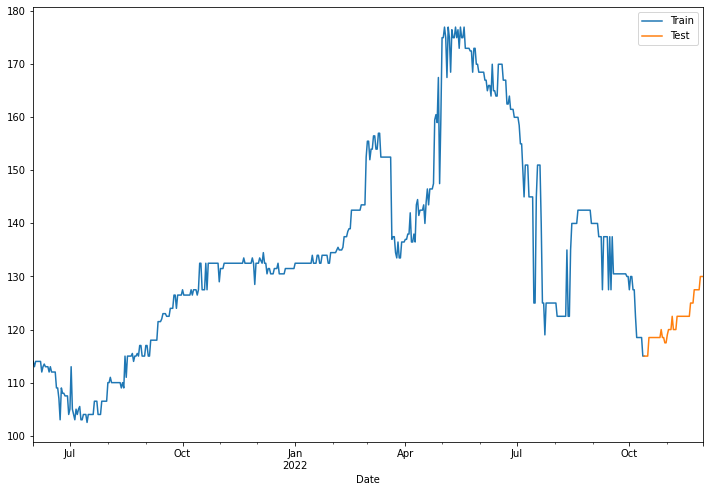

In [19]:
train_data['Price'].plot(legend=True, label='Train', figsize=(12,8))
test_data['Price'].plot(legend=True, label='Test', figsize=(12,8))

In [20]:
test_data.describe()

,Price
count,49.000000
mean,121.397959
std,4.020753
min,115.000000
25%,118.500000
50%,120.000000
75%,122.500000
max,130.000000


In [21]:
mean_absolute_error(test_data,test_predictions)


5.524147538795625

In [22]:
mean_squared_error(test_data, test_predictions)

43.369785090060404

In [23]:
from statsmodels.tools.eval_measures import rmse

In [24]:
rmse(test_data, test_predictions)

array([7.33418687, 5.60149484, 5.87121183, 6.05757547, 6.49212093,
       6.76696991, 7.49228389, 7.78559582, 7.12555131, 7.28172558,
       7.23479225, 6.44628203, 7.28392677, 6.46954463, 5.95087335,
       5.99456365, 5.77812216, 6.10531432, 6.1278229 , 6.12758054,
       6.77500139, 7.35811171, 6.75136366, 6.65656528, 6.99094642,
       7.1367659 , 6.26248053, 6.49249443, 7.01498899, 7.38253318,
       7.24773084, 5.52936529, 5.79576959, 5.98016694, 6.41090853,
       6.68379126, 7.40506262, 7.69709157, 7.04019603, 7.19553616,
       7.148847  , 6.36542727, 7.19772603, 6.38850722, 5.87456189,
       5.91779402, 5.70375506, 6.02743815, 6.04973095])

In [25]:
np.sqrt(mean_squared_error(test_data, test_predictions))

6.5855740137106045

In [26]:
final_model = ExponentialSmoothing(df['Price'], trend = 'add', seasonal = 'add', seasonal_periods = 60).fit()

In [27]:
forecast_predictions = final_model.forecast(60)

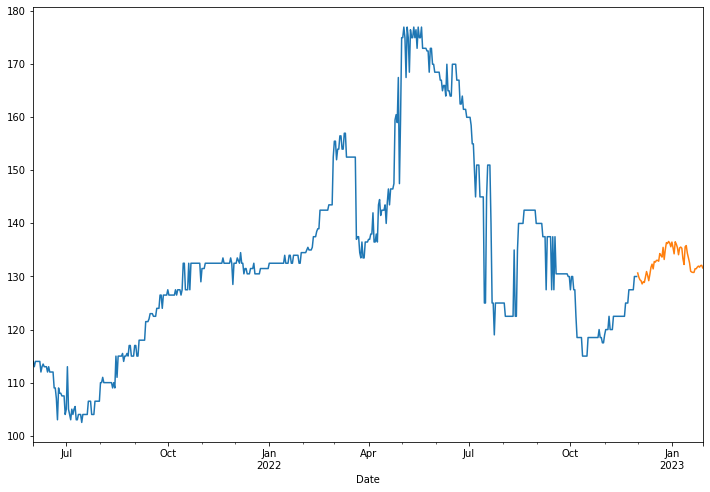

In [28]:
df['Price'].plot(figsize = (12,8))
forecast_predictions.plot(figsize=(12,8))

In [29]:
forecast_predictions

2022-12-01    130.656088
2022-12-02    129.878193
2022-12-03    129.378150
2022-12-04    129.211155
2022-12-05    128.599852
2022-12-06    128.988721
2022-12-07    128.877794
2022-12-08    129.878322
2022-12-09    130.934326
2022-12-10    130.212490
2022-12-11    129.212850
2022-12-12    130.379429
2022-12-13    131.713059
2022-12-14    132.324449
2022-12-15    131.435251
2022-12-16    132.824336
2022-12-17    132.713325
2022-12-18    133.046044
2022-12-19    133.045743
2022-12-20    132.879018
2022-12-21    134.322758
2022-12-22    133.989263
2022-12-23    133.656241
2022-12-24    135.489247
2022-12-25    133.211628
2022-12-26    135.045582
2022-12-27    136.378559
2022-12-28    136.212024
2022-12-29    136.601661
2022-12-30    136.323813
2022-12-31    135.601911
2023-01-01    136.491590
2023-01-02    135.435846
2023-01-03    134.268836
2023-01-04    136.546831
2023-01-05    136.101879
2023-01-06    135.435109
2023-01-07    134.102273
2023-01-08    135.379684
2023-01-09    135.546295


# *SARIMAX*

In [30]:
from datetime import datetime

In [31]:
df_KN = pd.read_csv('Palm_Oil.csv', index_col = 'Date', parse_dates = True)

In [32]:
df_KN.index.freq ='D'

In [33]:
df_KN.index

DatetimeIndex(['2021-06-01', '2021-06-02', '2021-06-03', '2021-06-04',
               '2021-06-05', '2021-06-06', '2021-06-07', '2021-06-08',
               '2021-06-09', '2021-06-10',
               ...
               '2022-11-21', '2022-11-22', '2022-11-23', '2022-11-24',
               '2022-11-25', '2022-11-26', '2022-11-27', '2022-11-28',
               '2022-11-29', '2022-11-30'],
              dtype='datetime64[ns]', name='Date', length=548, freq='D')

In [34]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [35]:
adf_test(df_KN['Price'])

ADF Statistics: -1.8348589391027335
p- value: 0.36329762101482166
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [36]:
## Use Techniques Differencing
df_KN['Price First Difference']=df_KN['Price']-df_KN['Price'].shift(1)

In [37]:
df_KN.head()

,Price,Price First Difference
Date,,
2021-06-01,114.0,NaN
2021-06-02,113.0,-1.0
2021-06-03,114.0,1.0
2021-06-04,114.0,0.0
2021-06-05,114.0,0.0


In [38]:
adf_test(df_KN['Price'].dropna())

ADF Statistics: -1.8348589391027335
p- value: 0.36329762101482166
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [39]:
df_KN['Price Second Difference']=df_KN['Price First Difference']-df_KN['Price First Difference'].shift(1)

In [40]:
adf_test(df_KN['Price Second Difference'].dropna())

ADF Statistics: -12.591324810655232
p- value: 1.8184961594126886e-23
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [41]:
### 1 months
## Use Techniques Differencing
df_KN['Price Monthly Difference']=df_KN['Price']-df_KN['Price'].shift(30)

In [42]:
adf_test(df_KN['Price Monthly Difference'].dropna())

ADF Statistics: -5.1130455261462355
p- value: 1.3196493092765584e-05
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


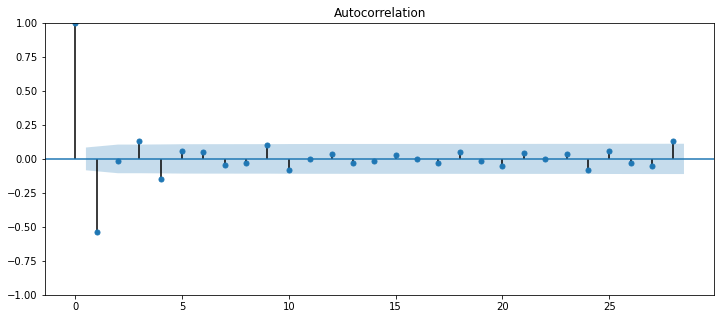

In [43]:
acf = plot_acf(df_KN['Price Second Difference'].dropna())

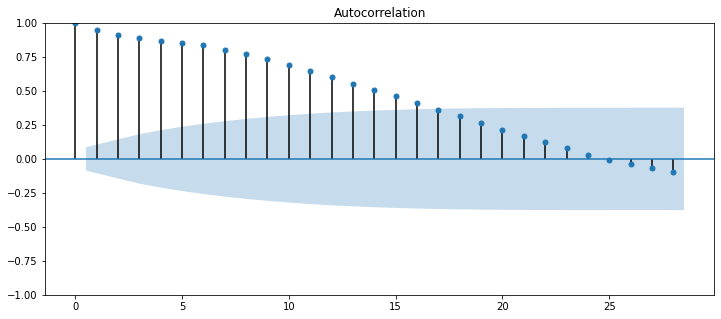

In [44]:
acf_monthly = plot_acf(df_KN['Price Monthly Difference'].dropna())

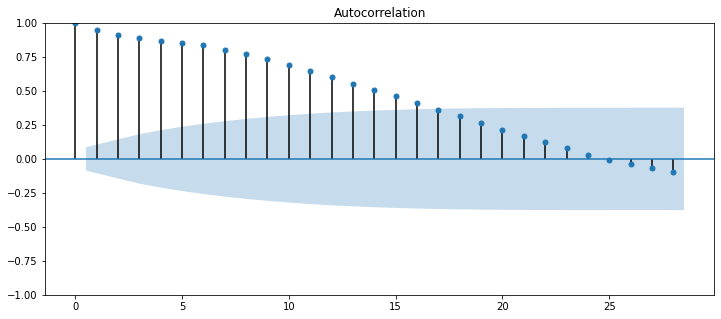

In [45]:
pacf_monthly = plot_acf(df_KN['Price Monthly Difference'].dropna())

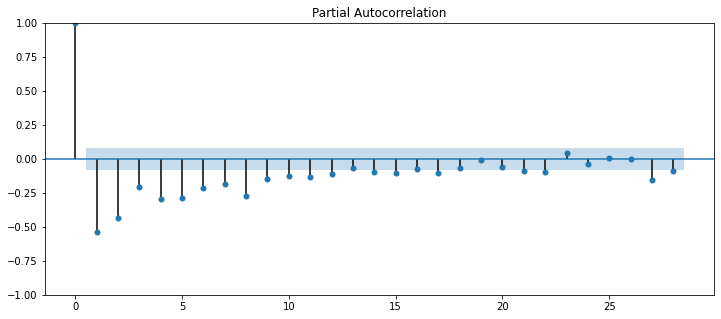

In [46]:
result_KN = plot_pacf(df_KN["Price Second Difference"].dropna())

In [47]:
from datetime import datetime,timedelta
train_dataset_end=datetime(2022,10,1)
test_dataset_end=datetime(2022,11,30)

In [48]:
train_data=df_KN[:train_dataset_end]
test_data=df_KN[train_dataset_end+timedelta(days=1):test_dataset_end]

In [49]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [50]:
test_data

,Price,Price First Difference,Price Second Difference,Price Monthly Difference
Date,,,,
2022-10-02,130.0,2.5,5.0,-10.0
2022-10-03,130.0,0.0,-2.5,-10.0
2022-10-04,127.5,-2.5,-2.5,-12.5
2022-10-05,127.5,0.0,2.5,-12.5
2022-10-06,122.5,-5.0,-5.0,-15.0
2022-10-07,118.5,-4.0,1.0,-19.0
2022-10-08,118.5,0.0,4.0,-19.0
2022-10-09,118.5,0.0,0.0,-9.0
2022-10-10,118.5,0.0,0.0,-19.0


In [51]:
import statsmodels.api as sm

In [52]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [53]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [54]:
from pmdarima import ARIMA

In [55]:
train_data

,Price,Price First Difference,Price Second Difference,Price Monthly Difference
Date,,,,
2021-06-01,114.0,NaN,NaN,NaN
2021-06-02,113.0,-1.0,NaN,NaN
2021-06-03,114.0,1.0,2.0,NaN
2021-06-04,114.0,0.0,-1.0,NaN
2021-06-05,114.0,0.0,0.0,NaN
...,...,...,...,...
2022-09-27,130.5,0.0,0.0,-12.0
2022-09-28,130.5,0.0,0.0,-12.0
2022-09-29,130.0,-0.5,-0.5,-12.5


In [56]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [59]:
model_SARIMAX=SARIMAX(train_data['Price'],order=(3,0,5),seasonal_order=(0,1,0,30))

In [60]:
model_SARIMAX_fit=model_SARIMAX.fit()

In [61]:
model_SARIMAX_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Price   No. Observations:                  488
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 30)   Log Likelihood               -1316.985
Date:                             Fri, 06 Jan 2023   AIC                           2651.969
Time:                                     20:55:49   BIC                           2689.111
Sample:                                 06-01-2021   HQIC                          2666.597
                                      - 10-01-2022                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2287     36.615      0.034      0.973     -70.535      72.993
ar.L2          0.4452     71.304      0.006      0.995    -139.308     140.198
ar.L3         -0.6862     34.951     -0.020      0.984     -69.189      67.817
ma.L1         -0.5242     36.622     -0.014      0.989     -72.303      71.254
ma.L2         -0.9582     45.511     -0.021      0.983     -90.157      88.241
ma.L3          0.2996      2.371      0.126      0.899      -4.347       4.946
ma.L4          0.2985     12.654      0.024      0.981     -24.502      25.099
ma.L5          0.0350      1.822      0.019      0.985      -3.537       3.607
sigma2        18.2636      0.707     25.830      0.000      16.878      19.649
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               704.04
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               5.67   Skew:                            -0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [62]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

2022-10-02 00:00:00
2022-11-30 00:00:00


In [63]:
pred_Sarimax=model_SARIMAX_fit.predict(start=datetime(2022,10,2),end=datetime(2022,11,30))
residuals=test_data['Price']-pred_Sarimax

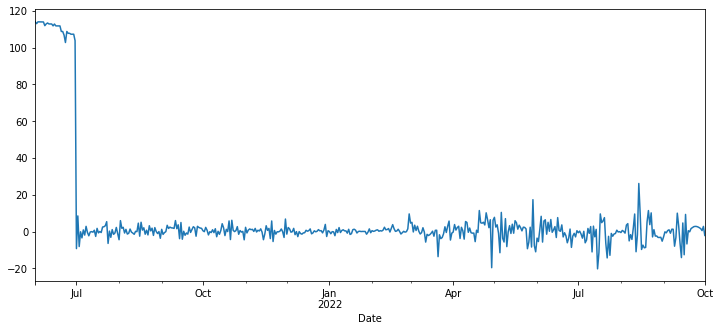

In [64]:
model_SARIMAX_fit.resid.plot()

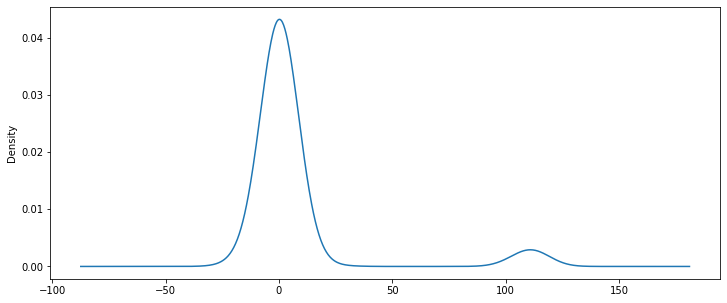

In [65]:
model_SARIMAX_fit.resid.plot(kind='kde')

In [66]:
test_data['Predicted_SARIMAX']=pred_Sarimax

In [67]:
test_data

,Price,Price First Difference,Price Second Difference,Price Monthly Difference,Predicted_SARIMAX
Date,,,,,
2022-10-02,130.0,2.5,5.0,-10.0,127.896544
2022-10-03,130.0,0.0,-2.5,-10.0,129.493010
2022-10-04,127.5,-2.5,-2.5,-12.5,130.503245
2022-10-05,127.5,0.0,2.5,-12.5,131.429538
2022-10-06,122.5,-5.0,-5.0,-15.0,129.877855
2022-10-07,118.5,-4.0,1.0,-19.0,130.835901
2022-10-08,118.5,0.0,4.0,-19.0,131.799611
2022-10-09,118.5,0.0,0.0,-9.0,122.759496
2022-10-10,118.5,0.0,0.0,-19.0,133.710530


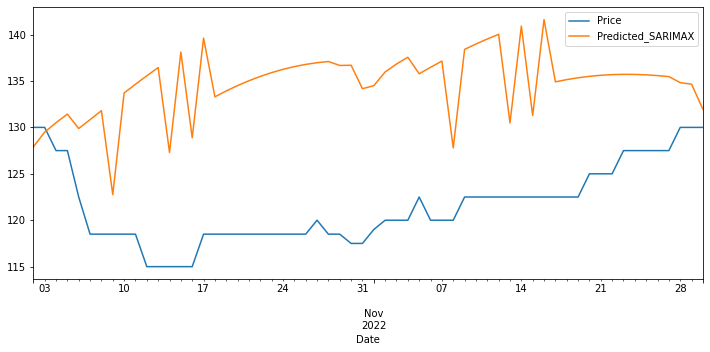

In [68]:
test_data[['Price','Predicted_SARIMAX']].plot()

In [69]:
pred_Sarimax

2022-10-02    127.896544
2022-10-03    129.493010
2022-10-04    130.503245
2022-10-05    131.429538
2022-10-06    129.877855
2022-10-07    130.835901
2022-10-08    131.799611
2022-10-09    122.759496
2022-10-10    133.710530
2022-10-11    134.645097
2022-10-12    135.558115
2022-10-13    136.443399
2022-10-14    127.296312
2022-10-15    138.111890
2022-10-16    128.886216
2022-10-17    139.615446
2022-10-18    133.296520
2022-10-19    133.926657
2022-10-20    134.503714
2022-10-21    135.025919
2022-10-22    135.492050
2022-10-23    135.901286
2022-10-24    136.253292
2022-10-25    136.548129
2022-10-26    136.786283
2022-10-27    136.968613
2022-10-28    137.096347
2022-10-29    136.671042
2022-10-30    136.694569
2022-10-31    134.169077
2022-11-01    134.493516
2022-11-02    135.973891
2022-11-03    136.826877
2022-11-04    137.557752
2022-11-05    135.775615
2022-11-06    136.471407
2022-11-07    137.144383
2022-11-08    127.788430
2022-11-09    138.401919
2022-11-10    138.980638


In [70]:
predicted_value_SARIMA = pred_Sarimax

In [71]:
predicted_value_SARIMA = model_SARIMAX_fit.predict(start=datetime(2022,10,2),end=datetime(2022,11,30))

In [72]:
mean_absolute_error(test_data['Price'], test_data['Predicted_SARIMAX'])

13.248699478598875

In [73]:
mean_squared_error(test_data['Price'], test_data['Predicted_SARIMAX'])

205.7103994324315

In [74]:
rmse(test_data['Predicted_SARIMAX'], test_data['Price'])

14.342607832344559

# ***FB Prophet***

In [75]:
df_fb  = pd.read_csv('Palm_Oil.csv')

In [76]:
df_fb.columns = ['ds', 'y']

In [77]:
df_fb['ds'] =pd.to_datetime(df_fb['ds'])

In [78]:
df_fb.head()

,ds,y
0,2021-06-01,114.0
1,2021-06-02,113.0
2,2021-06-03,114.0
3,2021-06-04,114.0
4,2021-06-05,114.0


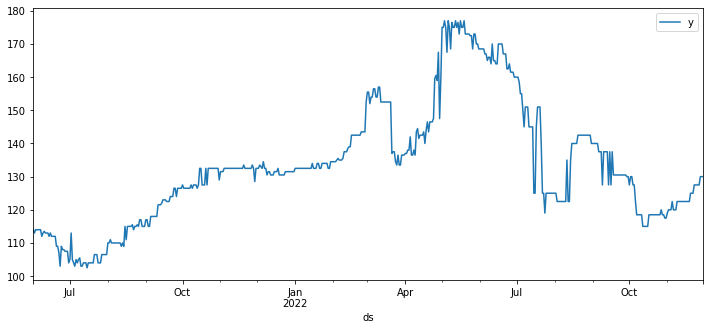

In [79]:
df_fb.plot(x='ds', y='y')

In [80]:
len(df_fb)

548

In [81]:
train_fb = df_fb.iloc[:488]
test_fb = df_fb.iloc[488:]

In [82]:
import prophet

In [83]:
import io, os, sys, setuptools, tokenize

In [84]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [85]:
from fbprophet import Prophet

In [86]:
m = Prophet()
m.fit(train_fb)
future = m.make_future_dataframe(periods=60)
forecast = m.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [87]:
forecast.tail(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
543,2022-11-26,104.543367,94.716056,113.558282,100.609838,108.460322,-0.148818,-0.148818,-0.148818,-0.148818,-0.148818,-0.148818,0.0,0.0,0.0,104.394549
544,2022-11-27,104.206863,94.825317,114.783198,100.215393,108.226680,-0.131686,-0.131686,-0.131686,-0.131686,-0.131686,-0.131686,0.0,0.0,0.0,104.075177
545,2022-11-28,103.870359,93.485583,114.787953,99.756378,108.019674,0.213976,0.213976,0.213976,0.213976,0.213976,0.213976,0.0,0.0,0.0,104.084336
546,2022-11-29,103.533856,93.965201,114.779060,99.285552,107.819703,0.421661,0.421661,0.421661,0.421661,0.421661,0.421661,0.0,0.0,0.0,103.955516
547,2022-11-30,103.197352,92.565656,114.556183,98.827074,107.607528,0.021460,0.021460,0.021460,0.021460,0.021460,0.021460,0.0,0.0,0.0,103.218812


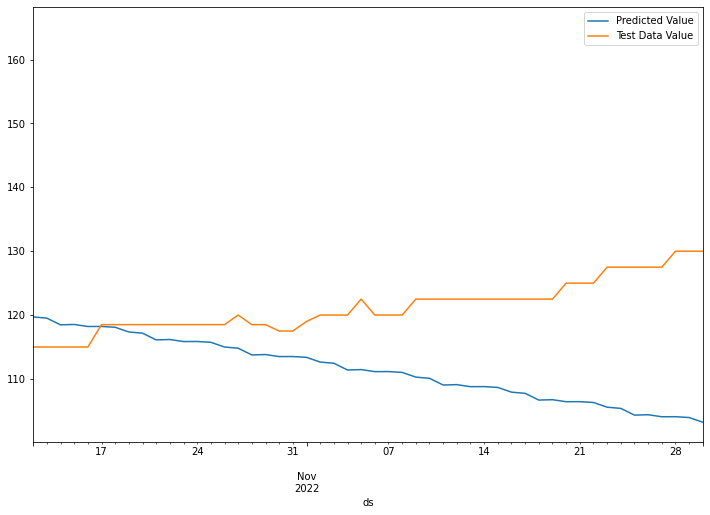

In [88]:
ax = forecast.plot(x='ds', y = 'yhat', label = 'Predicted Value', legend = True, figsize = (12, 8))
test_fb.plot(x='ds', y = 'y', label = 'Test Data Value', legend = True, ax = ax, xlim=('2022-10-12','2022-11-30'))

In [89]:
from statsmodels.tools.eval_measures import rmse

In [90]:
predictions_fb = forecast.iloc[-60:]['yhat']

In [91]:
predictions_fb

488    122.919383
489    122.928542
490    122.799722
491    122.063017
492    121.874717
493    120.822295
494    120.883229
495    120.563857
496    120.573016
497    120.444196
498    119.707492
499    119.519191
500    118.466769
501    118.527703
502    118.208331
503    118.217490
504    118.088671
505    117.351966
506    117.163665
507    116.111243
508    116.172178
509    115.852806
510    115.861964
511    115.733145
512    114.996440
513    114.808140
514    113.755718
515    113.816652
516    113.497280
517    113.506439
518    113.377619
519    112.640915
520    112.452614
521    111.400192
522    111.461126
523    111.141754
524    111.150913
525    111.022094
526    110.285389
527    110.097088
528    109.044666
529    109.105600
530    108.786228
531    108.795387
532    108.666568
533    107.929863
534    107.741562
535    106.689140
536    106.750075
537    106.430703
538    106.439861
539    106.311042
540    105.574337
541    105.386037
542    104.333615
543    104

In [92]:
test_fb

,ds,y
488,2022-10-02,130.0
489,2022-10-03,130.0
490,2022-10-04,127.5
491,2022-10-05,127.5
492,2022-10-06,122.5
493,2022-10-07,118.5
494,2022-10-08,118.5
495,2022-10-09,118.5
496,2022-10-10,118.5
497,2022-10-11,118.5


In [93]:
mean_absolute_error(test_fb['y'], predictions_fb)

9.432568749876179

In [94]:
mean_squared_error(test_fb['y'], predictions_fb)

147.23744334143163

In [95]:
rmse(predictions_fb, test_fb['y'])

12.13414370037835

In [96]:
test_fb.mean()

y    121.558333
dtype: float64

In [97]:
from fbprophet.diagnostics import cross_validation, performance_metrics

In [98]:
#Intial Training period 
initial = 400
initial = str(initial) +' days'
initial 
#Period Length for we are going to run cross validation for 
period = 400
period = str(period) +' days'

#Horizon of prediction for each fold 
horizon = 60
horizon = str(horizon) + ' days'

In [99]:
dfb_cv = cross_validation(m, initial = initial, period=period, horizon = horizon)

INFO:fbprophet:Making 1 forecasts with cutoffs between 2022-08-02 00:00:00 and 2022-08-02 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

In [100]:
dfb_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2022-08-03,137.140108,129.643834,145.239784,122.5,2022-08-02
1,2022-08-04,136.492967,128.544062,143.635525,122.5,2022-08-02
2,2022-08-05,135.747508,127.402664,144.207699,122.5,2022-08-02
3,2022-08-06,135.422699,127.730894,143.531538,122.5,2022-08-02
4,2022-08-07,134.975120,127.471265,142.769785,122.5,2022-08-02


In [101]:
performance_metrics(dfb_cv)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,6 days,176.835964,13.297968,13.272993,0.108351,0.106817,0.000000
1,7 days,165.652551,12.870608,12.855297,0.104941,0.103665,0.000000
2,8 days,155.746296,12.479836,12.469397,0.101791,0.101366,0.000000
3,9 days,126.856825,11.263074,10.506408,0.085581,0.099973,0.166667
4,10 days,116.654228,10.800659,10.066786,0.081993,0.097190,0.166667
5,11 days,107.250251,10.356170,9.647626,0.078571,0.089643,0.166667
6,12 days,83.277926,9.125674,8.085603,0.065443,0.082633,0.333333
7,13 days,69.682268,8.347591,7.413779,0.058581,0.069593,0.333333
8,14 days,58.515620,7.649550,6.855619,0.052608,0.058684,0.333333
9,15 days,71.018301,8.427236,8.074852,0.061252,0.061120,0.166667


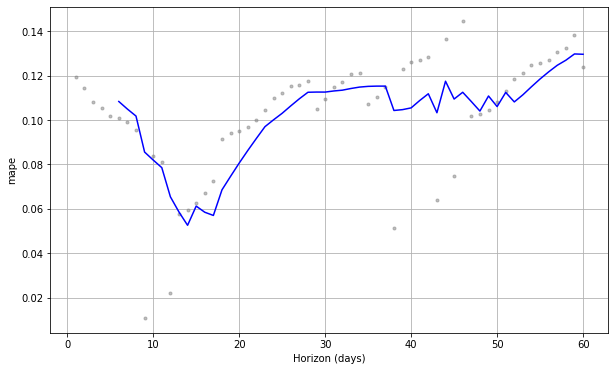

In [102]:
plot_cross_validation_metric(dfb_cv, metric = 'mape');

# **TREND FB**

In [103]:
df_t = pd.read_csv('Palm_Oil.csv')

In [104]:
df_t.columns = ['ds', 'y']

In [105]:
df_t['ds'] = pd.to_datetime(df_t['ds'])

In [106]:
t = Prophet(yearly_seasonality=True, daily_seasonality=True)

In [107]:
t.fit(df_t)

In [108]:
future_t = t.make_future_dataframe(periods=12)
forecast_t = t.predict(future)

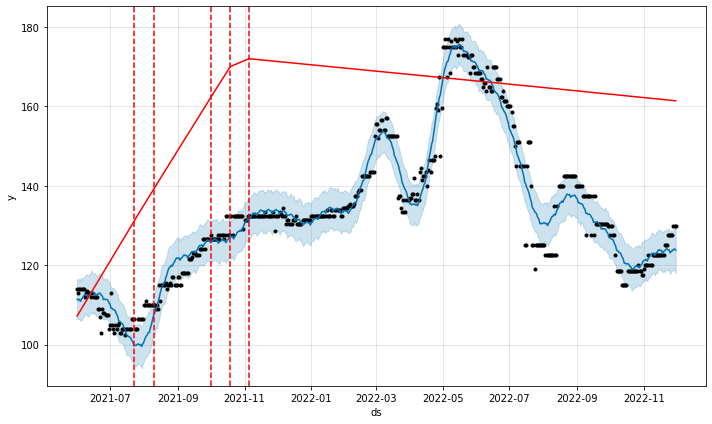

In [109]:
from fbprophet.plot import add_changepoints_to_plot
fig = t.plot(forecast_t)
a = add_changepoints_to_plot(fig.gca(), t, forecast_t)

In [110]:
df_S = pd.read_csv('Palm_Oil.csv')

In [111]:
df_S.columns = ['ds', 'y']

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


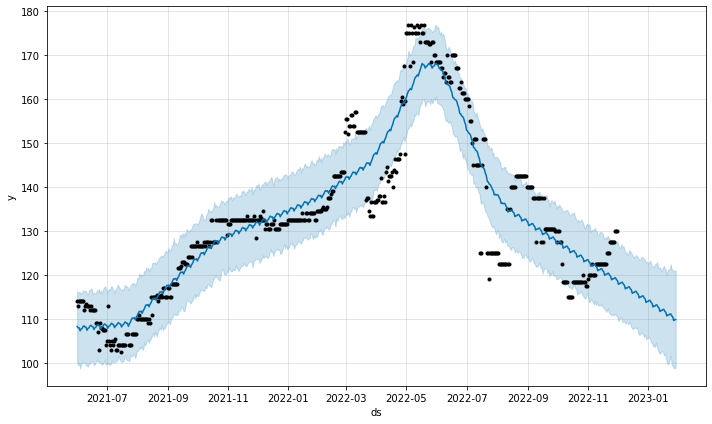

In [112]:
S = Prophet()
S.fit(df_S)
future = S.make_future_dataframe(60)
forecast = S.predict(future)
figure = S.plot(forecast)

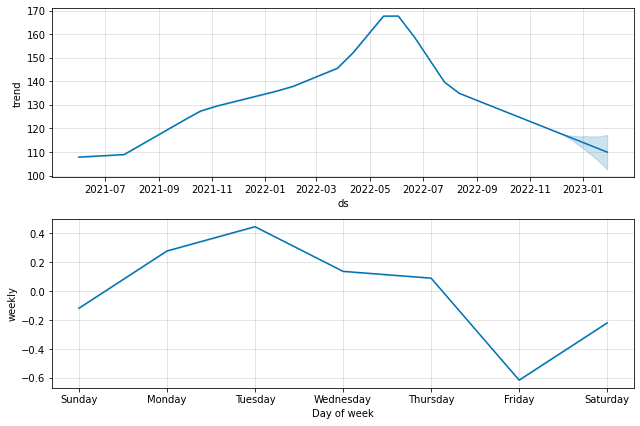

In [113]:
figure = S.plot_components(forecast);

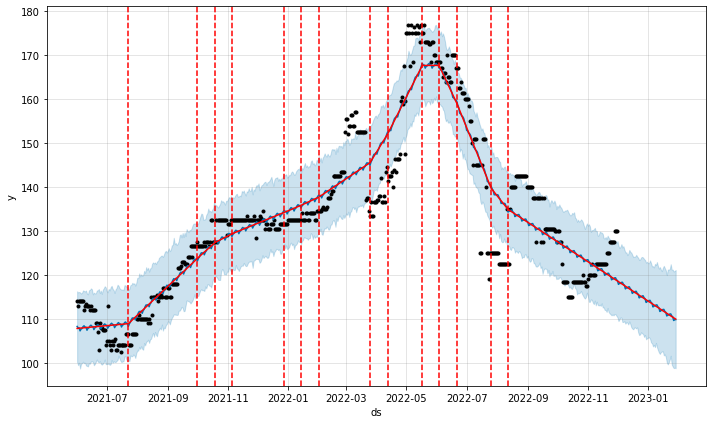

In [114]:
from fbprophet.plot import add_changepoints_to_plot 
figure = S.plot(forecast)
a = add_changepoints_to_plot(figure.gca(), S, forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


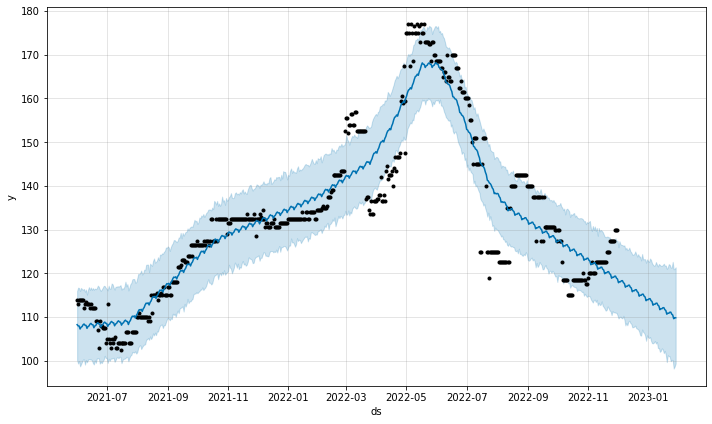

In [115]:
S = Prophet(seasonality_mode='additive')
S.fit(df_S)
future = S.make_future_dataframe(60)
forecast = S.predict(future)
figure = S.plot(forecast)

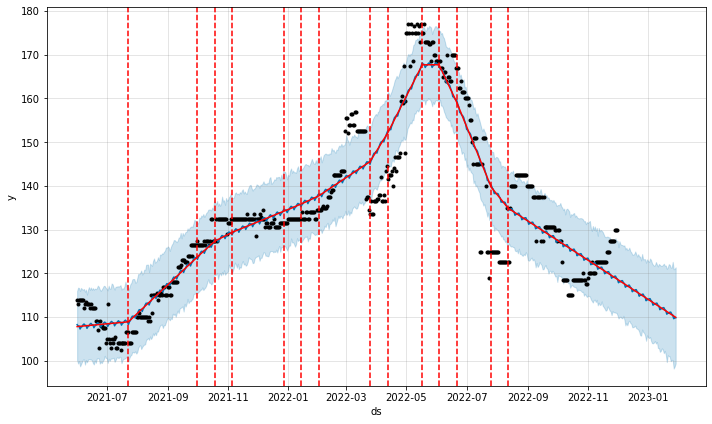

In [116]:
from fbprophet.plot import add_changepoints_to_plot 
figure = S.plot(forecast)
a = add_changepoints_to_plot(figure.gca(), S, forecast)

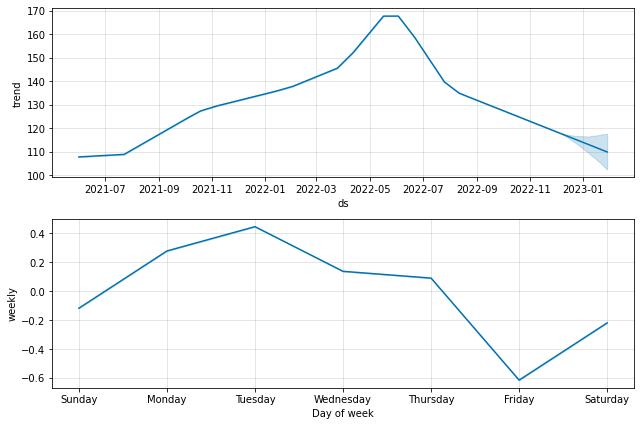

In [117]:
figure = S.plot_components(forecast)

# ***LSTM***

In [118]:
df_LSTM=pd.read_csv("Palm_Oil.csv",parse_dates=["Date"],index_col=[0])

In [119]:
print(df_LSTM.index.freq)

None


In [120]:
test_split=round(len(df_LSTM)*0.20)

In [121]:
df_for_training=df[:-110]
df_for_testing=df[-110:]

In [122]:
print(df_for_training.shape)
print(df_for_testing.shape)

(438, 1)
(110, 1)


In [123]:
scaler = MinMaxScaler(feature_range=(0,1))
df_for_training_scaled = scaler.fit_transform(df_for_training)

In [124]:
df_for_testing_scaled=scaler.transform(df_for_testing)

In [125]:
df_for_training_scaled

array([[0.15436242],
       [0.1409396 ],
       [0.15436242],
       [0.15436242],
       [0.15436242],
       [0.15436242],
       [0.15436242],
       [0.12751678],
       [0.1409396 ],
       [0.14765101],
       [0.1409396 ],
       [0.1409396 ],
       [0.1409396 ],
       [0.12751678],
       [0.1409396 ],
       [0.12751678],
       [0.12751678],
       [0.12751678],
       [0.12751678],
       [0.08724832],
       [0.08724832],
       [0.06040268],
       [0.00671141],
       [0.08724832],
       [0.0738255 ],
       [0.0738255 ],
       [0.06711409],
       [0.06711409],
       [0.06711409],
       [0.02013423],
       [0.03355705],
       [0.1409396 ],
       [0.03355705],
       [0.02013423],
       [0.00671141],
       [0.03355705],
       [0.02013423],
       [0.03355705],
       [0.04026846],
       [0.00671141],
       [0.00671141],
       [0.02013423],
       [0.02013423],
       [0.02013423],
       [0.        ],
       [0.02013423],
       [0.02013423],
       [0.020

In [126]:
df_for_training_scaled.shape

(438, 1)

In [127]:
df_for_testing_scaled.shape

(110, 1)

In [128]:
def createXY(dataset,n_past):
    dataX = []
    dataY = []
    for i in range(n_past, len(dataset)):
            dataX.append(dataset[i - n_past:i, 0:dataset.shape[1]])
            dataY.append(dataset[i,0])
    return np.array(dataX),np.array(dataY)

In [129]:
trainX,trainY=createXY(df_for_training_scaled,30)

In [130]:
trainX.shape

(408, 30, 1)

In [131]:
testX,testY=createXY(df_for_testing_scaled,30)

In [132]:
trainX[0]

array([[0.15436242],
       [0.1409396 ],
       [0.15436242],
       [0.15436242],
       [0.15436242],
       [0.15436242],
       [0.15436242],
       [0.12751678],
       [0.1409396 ],
       [0.14765101],
       [0.1409396 ],
       [0.1409396 ],
       [0.1409396 ],
       [0.12751678],
       [0.1409396 ],
       [0.12751678],
       [0.12751678],
       [0.12751678],
       [0.12751678],
       [0.08724832],
       [0.08724832],
       [0.06040268],
       [0.00671141],
       [0.08724832],
       [0.0738255 ],
       [0.0738255 ],
       [0.06711409],
       [0.06711409],
       [0.06711409],
       [0.02013423]])

In [133]:
print("trainX Shape-- ",trainX.shape)
print("trainY Shape-- ",trainY.shape)

trainX Shape--  (408, 30, 1)
trainY Shape--  (408,)


In [134]:
print("testX Shape-- ",testX.shape)
print("testY Shape-- ",testY.shape)

testX Shape--  (80, 30, 1)
testY Shape--  (80,)


In [135]:
print("trainX[0]-- \n",trainX[0])
print("\ntrainY[0]-- ",trainY[0])

trainX[0]-- 
 [[0.15436242]
 [0.1409396 ]
 [0.15436242]
 [0.15436242]
 [0.15436242]
 [0.15436242]
 [0.15436242]
 [0.12751678]
 [0.1409396 ]
 [0.14765101]
 [0.1409396 ]
 [0.1409396 ]
 [0.1409396 ]
 [0.12751678]
 [0.1409396 ]
 [0.12751678]
 [0.12751678]
 [0.12751678]
 [0.12751678]
 [0.08724832]
 [0.08724832]
 [0.06040268]
 [0.00671141]
 [0.08724832]
 [0.0738255 ]
 [0.0738255 ]
 [0.06711409]
 [0.06711409]
 [0.06711409]
 [0.02013423]]

trainY[0]--  0.033557046979865834


In [136]:
trainY[0]

0.033557046979865834

In [137]:
trainY.shape

(408,)

In [139]:
def build_model(optimizer):
    grid_model = Sequential()
    grid_model.add(LSTM(50,return_sequences=True,input_shape=(30,1)))
    grid_model.add(LSTM(50))
    grid_model.add(Dropout(0.2))
    grid_model.add(Dense(1))

    grid_model.compile(loss = 'mse',optimizer = optimizer)
    return grid_model
#Grid Search
grid_model = KerasRegressor(build_fn=build_model,verbose=1,validation_data=(testX,testY))
parameters = {'batch_size' : [16,24,32],
              'epochs' : [32,64],
              'optimizer' : ['adam','Adadelta'] }

grid_search  = GridSearchCV(estimator = grid_model,
                            param_grid = parameters,
                            cv = 2)

In [140]:
grid_search = grid_search.fit(trainX,trainY)

Epoch 1/32
13/13 [==============================] - 6s 124ms/step - loss: 0.1433 - val_loss: 0.0229
Epoch 2/32
13/13 [==============================] - 0s 35ms/step - loss: 0.0237 - val_loss: 0.0070
Epoch 3/32
13/13 [==============================] - 0s 34ms/step - loss: 0.0164 - val_loss: 0.0076
Epoch 4/32
13/13 [==============================] - 0s 34ms/step - loss: 0.0134 - val_loss: 0.0066
Epoch 5/32
13/13 [==============================] - 0s 35ms/step - loss: 0.0132 - val_loss: 0.0062
Epoch 6/32
13/13 [==============================] - 0s 33ms/step - loss: 0.0125 - val_loss: 0.0040
Epoch 7/32
13/13 [==============================] - 0s 33ms/step - loss: 0.0130 - val_loss: 0.0023
Epoch 8/32
13/13 [==============================] - 0s 33ms/step - loss: 0.0100 - val_loss: 0.0041
Epoch 9/32
13/13 [==============================] - 0s 32ms/step - loss: 0.0119 - val_loss: 0.0036
Epoch 10/32
13/13 [==============================] - 0s 34ms/step - loss: 0.0098 - val_loss: 0.0021
Epoch 11

In [141]:
grid_search.best_params_

{'batch_size': 24, 'epochs': 32, 'optimizer': 'adam'}

In [142]:
my_model=grid_search.best_estimator_.model

In [143]:
my_model

In [144]:
prediction=my_model.predict(testX)

3/3 [==============================] - 4s 38ms/step


In [145]:
print("prediction\n", prediction)
print("\nPrediction Shape-",prediction.shape)

prediction
 [[0.44343004]
 [0.4409165 ]
 [0.440906  ]
 [0.431324  ]
 [0.42834893]
 [0.41797414]
 [0.4154781 ]
 [0.41014332]
 [0.40351173]
 [0.39661688]
 [0.3901023 ]
 [0.3844194 ]
 [0.37983546]
 [0.3764575 ]
 [0.37426665]
 [0.3731528 ]
 [0.37294853]
 [0.37345758]
 [0.3739039 ]
 [0.3744842 ]
 [0.37212944]
 [0.370802  ]
 [0.37020677]
 [0.36737695]
 [0.36326888]
 [0.3530314 ]
 [0.33480203]
 [0.31239986]
 [0.28932843]
 [0.26651958]
 [0.24616991]
 [0.22554551]
 [0.20641224]
 [0.19032456]
 [0.17666204]
 [0.16672876]
 [0.16279615]
 [0.1642721 ]
 [0.16937235]
 [0.17680225]
 [0.18544236]
 [0.19438393]
 [0.2029378 ]
 [0.21062423]
 [0.21715078]
 [0.2223824 ]
 [0.2278737 ]
 [0.2315833 ]
 [0.23378761]
 [0.2336662 ]
 [0.23196658]
 [0.23063385]
 [0.23074971]
 [0.23200108]
 [0.23393445]
 [0.23902673]
 [0.24338296]
 [0.24683672]
 [0.2493454 ]
 [0.25361395]
 [0.25880262]
 [0.26442984]
 [0.269879  ]
 [0.27478793]
 [0.27892607]
 [0.28217965]
 [0.28439653]
 [0.2857696 ]
 [0.2864095 ]
 [0.28645244]
 [0.2887

In [146]:
scaler.inverse_transform(prediction)

array([[135.53554 ],
       [135.34828 ],
       [135.3475  ],
       [134.63364 ],
       [134.412   ],
       [133.63908 ],
       [133.45311 ],
       [133.05568 ],
       [132.56161 ],
       [132.04796 ],
       [131.56262 ],
       [131.13925 ],
       [130.79774 ],
       [130.54608 ],
       [130.38287 ],
       [130.29988 ],
       [130.28467 ],
       [130.32259 ],
       [130.35585 ],
       [130.39908 ],
       [130.22363 ],
       [130.12476 ],
       [130.0804  ],
       [129.86958 ],
       [129.56354 ],
       [128.80084 ],
       [127.44275 ],
       [125.77379 ],
       [124.05497 ],
       [122.35571 ],
       [120.83965 ],
       [119.30314 ],
       [117.877716],
       [116.679184],
       [115.66132 ],
       [114.921295],
       [114.62832 ],
       [114.73827 ],
       [115.11824 ],
       [115.67177 ],
       [116.31546 ],
       [116.981606],
       [117.618866],
       [118.19151 ],
       [118.677734],
       [119.06749 ],
       [119.47659 ],
       [119.7

In [147]:
prediction_copies_array = np.repeat(prediction,1, axis=-1)

In [148]:
prediction_copies_array.shape

(80, 1)

In [149]:
prediction_copies_array

array([[0.44343004],
       [0.4409165 ],
       [0.440906  ],
       [0.431324  ],
       [0.42834893],
       [0.41797414],
       [0.4154781 ],
       [0.41014332],
       [0.40351173],
       [0.39661688],
       [0.3901023 ],
       [0.3844194 ],
       [0.37983546],
       [0.3764575 ],
       [0.37426665],
       [0.3731528 ],
       [0.37294853],
       [0.37345758],
       [0.3739039 ],
       [0.3744842 ],
       [0.37212944],
       [0.370802  ],
       [0.37020677],
       [0.36737695],
       [0.36326888],
       [0.3530314 ],
       [0.33480203],
       [0.31239986],
       [0.28932843],
       [0.26651958],
       [0.24616991],
       [0.22554551],
       [0.20641224],
       [0.19032456],
       [0.17666204],
       [0.16672876],
       [0.16279615],
       [0.1642721 ],
       [0.16937235],
       [0.17680225],
       [0.18544236],
       [0.19438393],
       [0.2029378 ],
       [0.21062423],
       [0.21715078],
       [0.2223824 ],
       [0.2278737 ],
       [0.231

In [150]:
pred=scaler.inverse_transform(np.reshape(prediction_copies_array,(len(prediction),1)))[:,0]

In [151]:
pred

array([135.53554 , 135.34828 , 135.3475  , 134.63364 , 134.412   ,
       133.63908 , 133.45311 , 133.05568 , 132.56161 , 132.04796 ,
       131.56262 , 131.13925 , 130.79774 , 130.54608 , 130.38287 ,
       130.29988 , 130.28467 , 130.32259 , 130.35585 , 130.39908 ,
       130.22363 , 130.12476 , 130.0804  , 129.86958 , 129.56354 ,
       128.80084 , 127.44275 , 125.77379 , 124.05497 , 122.35571 ,
       120.83965 , 119.30314 , 117.877716, 116.679184, 115.66132 ,
       114.921295, 114.62832 , 114.73827 , 115.11824 , 115.67177 ,
       116.31546 , 116.981606, 117.618866, 118.19151 , 118.677734,
       119.06749 , 119.47659 , 119.75295 , 119.917175, 119.908134,
       119.78151 , 119.68222 , 119.69085 , 119.78409 , 119.928116,
       120.307495, 120.632034, 120.889336, 121.07623 , 121.39423 ,
       121.78079 , 122.20003 , 122.60599 , 122.9717  , 123.27999 ,
       123.522385, 123.68754 , 123.78984 , 123.8375  , 123.84071 ,
       124.01243 , 124.28924 , 124.623665, 125.17977 , 125.851

In [152]:
original_copies_array = np.repeat(testY,1, axis=-1)

original_copies_array.shape

original=scaler.inverse_transform(np.reshape(original_copies_array,(len(testY),1)))[:,0]

In [153]:
pred

array([135.53554 , 135.34828 , 135.3475  , 134.63364 , 134.412   ,
       133.63908 , 133.45311 , 133.05568 , 132.56161 , 132.04796 ,
       131.56262 , 131.13925 , 130.79774 , 130.54608 , 130.38287 ,
       130.29988 , 130.28467 , 130.32259 , 130.35585 , 130.39908 ,
       130.22363 , 130.12476 , 130.0804  , 129.86958 , 129.56354 ,
       128.80084 , 127.44275 , 125.77379 , 124.05497 , 122.35571 ,
       120.83965 , 119.30314 , 117.877716, 116.679184, 115.66132 ,
       114.921295, 114.62832 , 114.73827 , 115.11824 , 115.67177 ,
       116.31546 , 116.981606, 117.618866, 118.19151 , 118.677734,
       119.06749 , 119.47659 , 119.75295 , 119.917175, 119.908134,
       119.78151 , 119.68222 , 119.69085 , 119.78409 , 119.928116,
       120.307495, 120.632034, 120.889336, 121.07623 , 121.39423 ,
       121.78079 , 122.20003 , 122.60599 , 122.9717  , 123.27999 ,
       123.522385, 123.68754 , 123.78984 , 123.8375  , 123.84071 ,
       124.01243 , 124.28924 , 124.623665, 125.17977 , 125.851

In [154]:
print("Predicted Values-- " ,pred)
print("\nOriginal Values-- ",original)

Predicted Values--  [135.53554  135.34828  135.3475   134.63364  134.412    133.63908
 133.45311  133.05568  132.56161  132.04796  131.56262  131.13925
 130.79774  130.54608  130.38287  130.29988  130.28467  130.32259
 130.35585  130.39908  130.22363  130.12476  130.0804   129.86958
 129.56354  128.80084  127.44275  125.77379  124.05497  122.35571
 120.83965  119.30314  117.877716 116.679184 115.66132  114.921295
 114.62832  114.73827  115.11824  115.67177  116.31546  116.981606
 117.618866 118.19151  118.677734 119.06749  119.47659  119.75295
 119.917175 119.908134 119.78151  119.68222  119.69085  119.78409
 119.928116 120.307495 120.632034 120.889336 121.07623  121.39423
 121.78079  122.20003  122.60599  122.9717   123.27999  123.522385
 123.68754  123.78984  123.8375   123.84071  124.01243  124.28924
 124.623665 125.17977  125.85153  126.558975 127.2338   127.83997
 128.5547   129.29033 ]

Original Values--  [137.5 137.5 127.5 137.5 127.5 137.5 130.5 130.5 130.5 130.5 130.5 130.5
 1

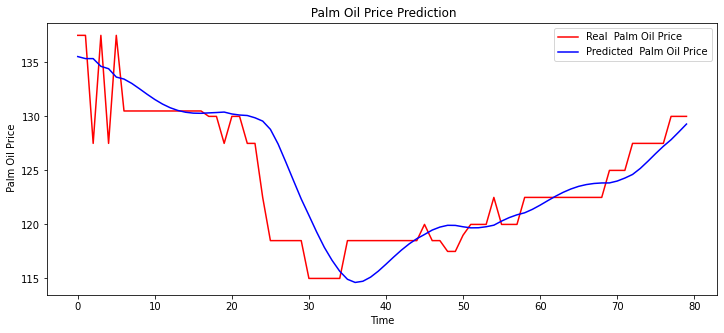

In [159]:
plt.plot(original, color = 'red', label = 'Real  Palm Oil Price')
plt.plot(pred, color = 'blue', label = 'Predicted  Palm Oil Price')
plt.title(' Palm Oil Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Palm Oil Price')
plt.legend()
plt.show()

In [156]:
mean_absolute_error(original, pred)

2.0750186920166014

In [157]:
mean_squared_error(original, pred)

8.943851212361192

In [158]:
rmse(pred, original)

2.990627227248691